<a href="https://colab.research.google.com/github/raz0208/City-Person-Dataset-EDA/blob/main/CityPersonDatasetEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CityPerson Dataset EDA (Exploratory Data Analysis)**
A complete EDA (Exploratory Data Analysis) for CityPerson dataset

## Used Dataset:


*   gtFine_trainvaltest
*   gtFinePanopticParts_trainval

## Step 1: Extract and read the datasets

In [34]:
# Instal Required Libraries
import zipfile
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter
import numpy as np
import pandas as pd
import json
from collections import defaultdict

In [2]:
# Dataset zip files path from Google Drive
gtFine = '/content/drive/MyDrive/CityPersonDataset/gtFine_trainvaltest.zip'
gtFinePanopticParts = '/content/drive/MyDrive/CityPersonDataset/gtFinePanopticParts_trainval.zip'
gtBbox = '/content/drive/MyDrive/CityPersonDataset/gtBbox_cityPersons_trainval.zip'

gtFine_ExtPath = '/content/CityPersonDataset/gtFine_trainvaltest'
gtFinePano_ExtPath = '/content/CityPersonDataset/gtFinePanopticParts_trainval'
gtBbox_ExtPath = '/content/CityPersonDataset/gtBbox_cityPersons_trainval'

In [3]:
# Extracting files function
def extract_zip(file_path, extract_path):
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)
    with zipfile.ZipFile(file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

# Extract both datasets zip files
extract_zip(gtFine, gtFine_ExtPath)
extract_zip(gtFinePanopticParts, gtFinePano_ExtPath)
extract_zip(gtBbox, gtBbox_ExtPath)

## Dataset Structure:

1.   gtFine_trainvaltest
  *   Contains PNG and JSON files.
  *   Organized by:
       * Train, validation, and test folders.
  *   Files Type:
      * *_color.png: Color-coded images for segmentation.
      * *_instanceIds.png: Encoded image masks where each pedestrian is represented with a unique ID.
      * *_labelIds.png: Encoded image masks for class labels.
      * *_polygons.json: Contains polygonal annotations for semantic segmentation, instance
2. gtFinePanopticParts_trainval:
    * Contains TIF files.
    * Organized similarly to gtFine_trainvaltest.
    * File type:
      * *_gtFinePanopticParts.tif: Panoptic segmentation with part-level annotations (e.g., parts of a pedestrian like arms or legs).

In [4]:
# List the extracted content from both datasets
gtFine_Files = os.listdir(gtFine_ExtPath)
gtFinepano_Files = os.listdir(gtFinePano_ExtPath)
gtBbox_Files = os.listdir(gtBbox_ExtPath)

gtFine_Files, gtFinepano_Files, gtBbox_Files

(['license.txt', 'gtFine', 'README'],
 ['license.txt', 'gtFinePanopticParts', 'README_panopticParts.md'],
 ['license.txt', 'README_cityPersons', 'gtBboxCityPersons'])

In [5]:
# Path to core folder
gtFine_CorePath = os.path.join(gtFine_ExtPath, 'gtFine')
gtFinePano_CorePath = os.path.join(gtFinePano_ExtPath, 'gtFinePanopticParts')
gtBbox_CorePath = os.path.join(gtBbox_ExtPath, 'gtBboxCityPersons')

# List driectories inside core folders
gtFine_Dirs = os.listdir(gtFine_CorePath) if os.path.exists(gtFine_CorePath) else []
gtFinePano_Dirs = os.listdir(gtFinePano_CorePath) if os.path.exists(gtFinePano_CorePath) else []
gtBbox_Dirs = os.listdir(gtBbox_CorePath) if os.path.exists(gtBbox_CorePath) else []

gtFine_Dirs, gtFinePano_Dirs, gtBbox_Dirs

(['test', 'val', 'train'], ['val', 'train'], ['val', 'train'])

In [6]:
# Define the subdirectories
subdirs = gtFine_Dirs #["train", "val", "test"]

# Initialize dictionaries to store samples from each subdirectory
gtFine_CityFolders = {}
gtFinePano_CityFolders = {}
gtBbox_CityFolders = {}

# Process each subdirectory
for subdir in subdirs:
    gtFine_CityFolders[subdir] = os.listdir(os.path.join(gtFine_CorePath, subdir)) if subdir in gtFine_Dirs else []
    gtFinePano_CityFolders[subdir] = os.listdir(os.path.join(gtFinePano_CorePath, subdir)) if subdir in gtFinePano_Dirs else []
    gtBbox_CityFolders[subdir] = os.listdir(os.path.join(gtBbox_CorePath, subdir)) if subdir in gtBbox_Dirs else []

# Output the first few files for each subdirectory
gtFine_CityFolders_Preview = {key: value[:] for key, value in gtFine_CityFolders.items()}
gtFinePano_CityFolders_Preview = {key: value[:] for key, value in gtFinePano_CityFolders.items()}
gtBbox_CityFolders_Preview = {key: value[:] for key, value in gtBbox_CityFolders.items()}

gtFine_CityFolders_Preview, gtFinePano_CityFolders_Preview, gtBbox_CityFolders_Preview

({'test': ['berlin', 'bielefeld', 'leverkusen', 'mainz', 'munich', 'bonn'],
  'val': ['munster', 'frankfurt', 'lindau'],
  'train': ['hanover',
   'dusseldorf',
   'aachen',
   'cologne',
   'stuttgart',
   'jena',
   'krefeld',
   'zurich',
   'bochum',
   'hamburg',
   'bremen',
   'strasbourg',
   'darmstadt',
   'ulm',
   'monchengladbach',
   'weimar',
   'erfurt',
   'tubingen']},
 {'test': [],
  'val': ['munster', 'frankfurt', 'lindau'],
  'train': ['hanover',
   'dusseldorf',
   'aachen',
   'cologne',
   'stuttgart',
   'jena',
   'krefeld',
   'zurich',
   'bochum',
   'hamburg',
   'bremen',
   'strasbourg',
   'darmstadt',
   'ulm',
   'monchengladbach',
   'weimar',
   'erfurt',
   'tubingen']},
 {'test': [],
  'val': ['munster', 'frankfurt', 'lindau'],
  'train': ['hanover',
   'dusseldorf',
   'aachen',
   'cologne',
   'stuttgart',
   'jena',
   'krefeld',
   'zurich',
   'bochum',
   'hamburg',
   'bremen',
   'strasbourg',
   'darmstadt',
   'ulm',
   'monchengladbach

In [7]:
# Count the distribution of file types in a given directory
def count_file_types(directory):
    if not os.path.exists(directory):
      print(f"Error: Directory '{directory}' not found.")
      return None

    file_type_counts = Counter()
    for root, _, files in os.walk(directory):
        for file in files:
            ext = os.path.splitext(file)[-1].lower()
            file_type_counts[ext] += 1
    return file_type_counts

# File type distribution for gtFine dataset
print("File Type Distribution in gtFine Dataset:")
gtFine_file_types = count_file_types(gtFine_CorePath)
print(pd.DataFrame(gtFine_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtFinePanopticParts dataset
print("\nFile Type Distribution in gtFinePanopticParts Dataset:")
gtFinePano_file_types = count_file_types(gtFinePano_CorePath)
print(pd.DataFrame(gtFinePano_file_types.items(), columns=["File Type", "Count"]))

# Analyze file type distribution for gtBboxCityPersons dataset
print("\nFile Type Distribution in gtBboxCityPersons Dataset:")
gtBbox_file_types = count_file_types(gtBbox_CorePath)
print(pd.DataFrame(gtBbox_file_types.items(), columns=["File Type", "Count"]))

File Type Distribution in gtFine Dataset:
  File Type  Count
0      .png  15000
1     .json   5000

File Type Distribution in gtFinePanopticParts Dataset:
  File Type  Count
0      .tif   3475

File Type Distribution in gtBboxCityPersons Dataset:
  File Type  Count
0     .json   3475


## Files structure

For example: the file structure in the "bochum" city directory confirms the expected dataset formats and relationships:

1. gtFine Dataset (bochum):
    - Files include:
       - Color-coded images (e.g., bochum_000000_000313_gtFine_color.png).
       - Instance masks (e.g., bochum_000000_000313_gtFine_instanceIds.png).
       - Label masks (e.g., bochum_000000_000313_gtFine_labelIds.png).
       - Polygon annotations (e.g., bochum_000000_000313_gtFine_polygons.json).

2. gtFinePanopticParts Dataset (bochum):
    - Files include:
      - Panoptic segmentation with part-level detail (e.g., bochum_000000_000313_gtFinePanopticParts.tif).

## Observed Relationship:
- The filenames match across datasets, indicating alignment.
  - For example: bochum_000000_000313_gtFinePanopticParts.tif aligns with the corresponding files in gtFine for color, instance, label, and polygons.

### Validate image and annotation files

In [8]:
# Validate image and annotation files

# Select 3 cities name randomly from 'train' folder to check files
selected_cities = random.sample(gtFine_CityFolders['train'], 3)

# List files for each selected city
gtFine_city_files = {}
gtFinePano_city_files = {}
gtBbox_city_files = {}
gtFine_city_files_sorted = {}
gtFinePano_city_files_sorted = {}
gtBbox_city_files_sorted = {}

for city in selected_cities:
    gtFine_city_path = os.path.join(gtFine_CorePath, "train", city)
    gtFinePano_city_path = os.path.join(gtFinePano_CorePath, "train", city)
    gtBbox_city_path = os.path.join(gtBbox_CorePath, "train", city)

    gtFine_city_files[city] = sorted(os.listdir(gtFine_city_path) if os.path.exists(gtFine_city_path) else [])
    gtFinePano_city_files[city] = sorted(os.listdir(gtFinePano_city_path) if os.path.exists(gtFinePano_city_path) else [])
    gtBbox_city_files[city] = sorted(os.listdir(gtBbox_city_path) if os.path.exists(gtBbox_city_path) else [])

    gtFine_city_files_sorted[city] = gtFine_city_files[city][:4]
    gtFinePano_city_files_sorted[city] = gtFinePano_city_files[city][:1]
    gtBbox_city_files_sorted[city] = gtBbox_city_files[city][:1]

# Preview sample files for each city
gtFine_city_files_sorted, gtFinePano_city_files_sorted, gtBbox_city_files_sorted

({'weimar': ['weimar_000000_000019_gtFine_color.png',
   'weimar_000000_000019_gtFine_instanceIds.png',
   'weimar_000000_000019_gtFine_labelIds.png',
   'weimar_000000_000019_gtFine_polygons.json'],
  'jena': ['jena_000000_000019_gtFine_color.png',
   'jena_000000_000019_gtFine_instanceIds.png',
   'jena_000000_000019_gtFine_labelIds.png',
   'jena_000000_000019_gtFine_polygons.json'],
  'bremen': ['bremen_000000_000019_gtFine_color.png',
   'bremen_000000_000019_gtFine_instanceIds.png',
   'bremen_000000_000019_gtFine_labelIds.png',
   'bremen_000000_000019_gtFine_polygons.json']},
 {'weimar': ['weimar_000000_000019_gtFinePanopticParts.tif'],
  'jena': ['jena_000000_000019_gtFinePanopticParts.tif'],
  'bremen': ['bremen_000000_000019_gtFinePanopticParts.tif']},
 {'weimar': ['weimar_000000_000019_gtBboxCityPersons.json'],
  'jena': ['jena_000000_000019_gtBboxCityPersons.json'],
  'bremen': ['bremen_000000_000019_gtBboxCityPersons.json']})

### Visualize sample images and annotations

The visualization showcases the following:

1. Color Image: A standard RGB image representing the scene.
2. Instance Mask: Encoded segmentation where each pedestrian instance is uniquely labeled.
3. Panoptic Segmentation: A TIF file providing part-level segmentation for pedestrians (e.g., distinguishing arms, legs, etc.).

This confirms the alignment between datasets and their usability for pedestrian detection tasks.

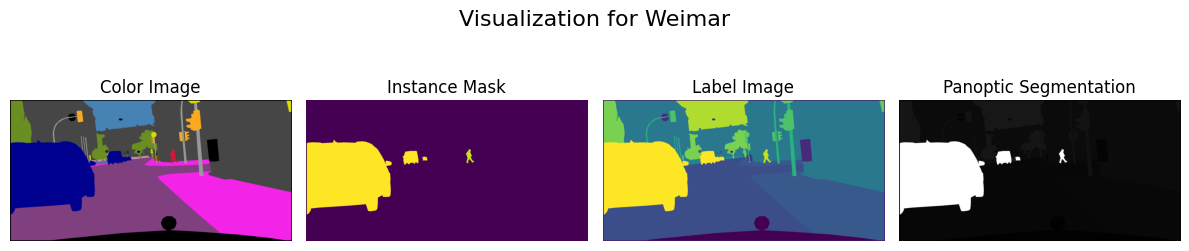

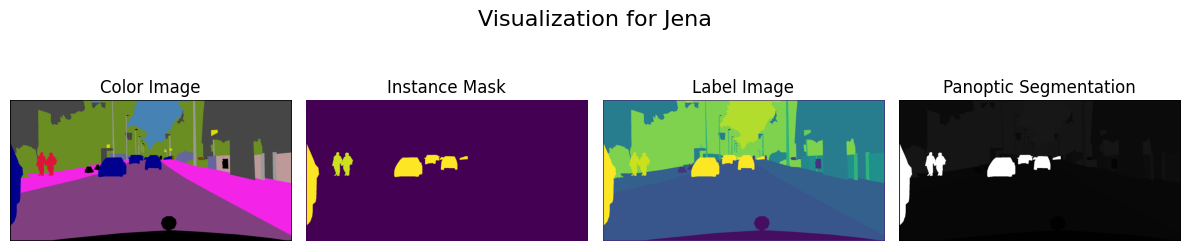

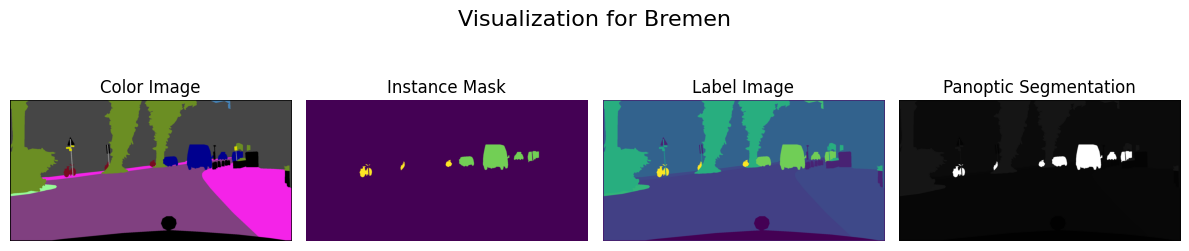

In [9]:
# File paths for sample images from selected cities
for city in selected_cities:
  # Geting files path
  color_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][0]) # '_gtFine_color.png'
  instance_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][1]) # '_gtFine_instanceIds.png'
  labelIds_image_path = os.path.join('/content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/', city, gtFine_city_files_sorted[city][2]) # '_gtFine_labelIds.png'
  panoptic_image_path = os.path.join('/content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/', city, gtFinePano_city_files_sorted[city][0]) # '_gtFinePanopticParts.tif'

  # Loading images
  color_image = Image.open(color_image_path)
  instance_image = Image.open(instance_image_path)
  label_image = Image.open(labelIds_image_path)
  panoptic_image = Image.open(panoptic_image_path)

  # Display the images
  fig, axs = plt.subplots(1, 4, figsize=(12, 3))
  fig.suptitle(f"Visualization for {city.capitalize()}", fontsize=16)

  axs[0].imshow(color_image)
  axs[0].set_title('Color Image')
  axs[0].axis('off')

  axs[1].imshow(instance_image, cmap='viridis')
  axs[1].set_title('Instance Mask')
  axs[1].axis('off')

  axs[2].imshow(label_image, cmap='viridis')
  axs[2].set_title('Label Image')
  axs[2].axis('off')

  axs[3].imshow(panoptic_image, cmap='viridis')
  axs[3].set_title('Panoptic Segmentation')
  axs[3].axis('off')

  plt.tight_layout()
  plt.show()

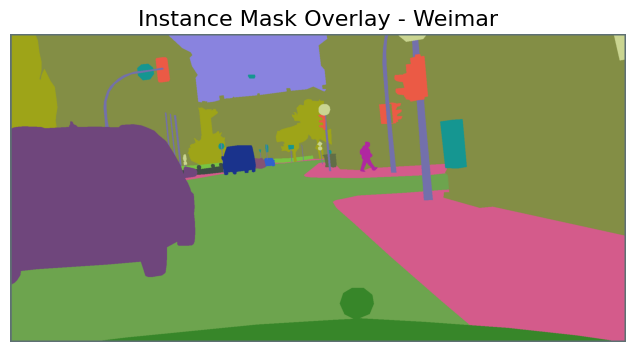

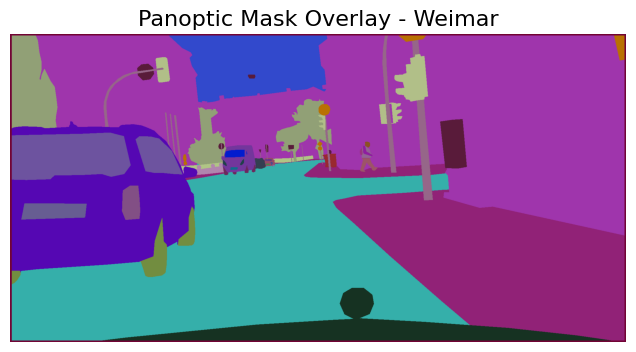

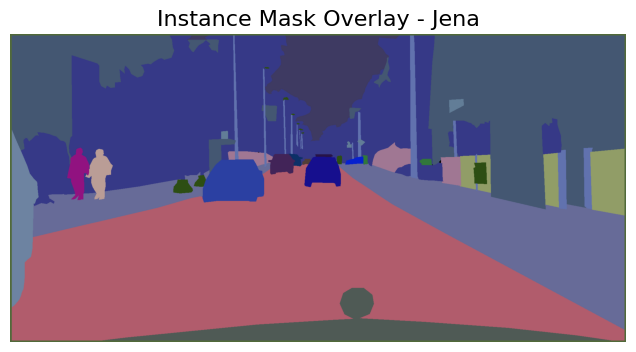

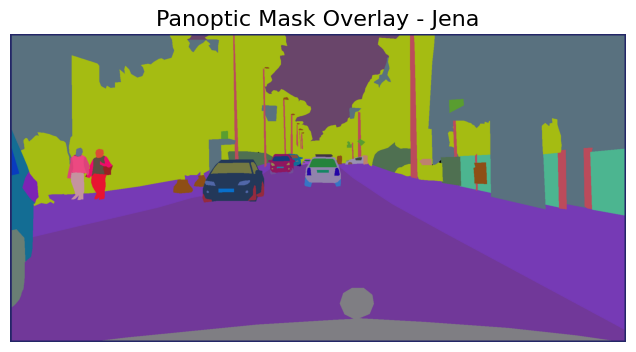

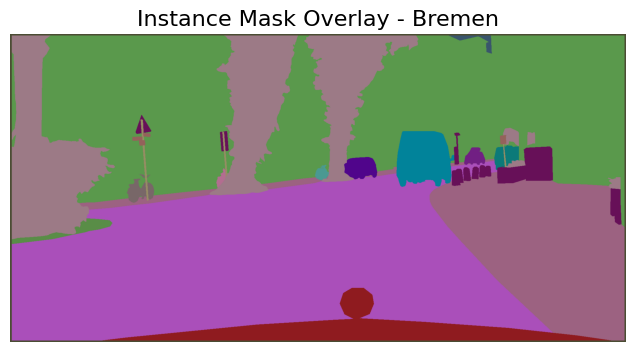

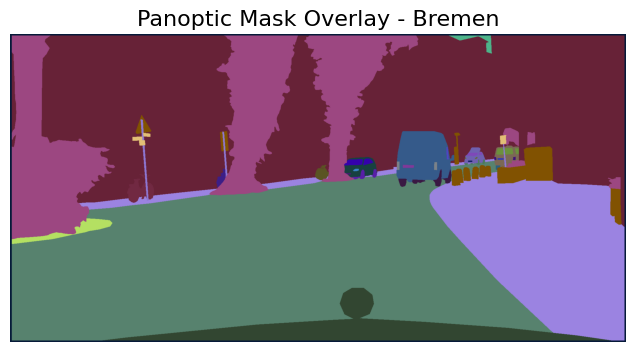

In [10]:
def overlay_masks(color_image_path, mask_image_path, title, alpha=0.6):
    # Load images
    color_image = np.array(Image.open(color_image_path))
    mask_image = np.array(Image.open(mask_image_path))

    # Ensure color image is RGB (drop alpha if present)
    if color_image.shape[-1] == 4:
        color_image = color_image[..., :3]

    # Ensure mask image is 2D
    if mask_image.ndim > 2:
        mask_image = mask_image[..., 0]  # Use only the first channel

    # Initialize an RGB mask array
    mask_image_resized = np.zeros((*mask_image.shape, 3), dtype=np.uint8)

    # Assign random colors to unique IDs in the mask
    unique_ids = np.unique(mask_image)
    for uid in unique_ids:
        if uid != 0:  # Skip the background
            color = np.random.randint(0, 255, size=(3,), dtype=np.uint8)
            mask_image_resized[mask_image == uid] = color

    # Combine the color image and mask with transparency
    overlayed_image = (1 - alpha) * color_image + alpha * mask_image_resized
    overlayed_image = overlayed_image.astype(np.uint8)

    # Plot the result
    plt.figure(figsize=(8, 4))
    plt.imshow(overlayed_image)
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

# Select sample paths
for city in selected_cities:
    color_image_path = os.path.join(gtFine_CorePath, "train", city, gtFine_city_files_sorted[city][0])  # Color image
    instance_mask_path = os.path.join(gtFine_CorePath, "train", city, gtFine_city_files_sorted[city][1])  # Instance mask
    panoptic_mask_path = os.path.join(gtFinePano_CorePath, "train", city, gtFinePano_city_files_sorted[city][0])  # Panoptic segmentation mask

    # Overlay instance mask
    overlay_masks(color_image_path, instance_mask_path, f"Instance Mask Overlay - {city.capitalize()}")

    # Overlay panoptic mask
    overlay_masks(color_image_path, panoptic_mask_path, f"Panoptic Mask Overlay - {city.capitalize()}")


In [36]:
# Parse a JSON annotation file function
def parse_json_file(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    print("Keys in JSON file:", data.keys())
    return data

# Create a list of all JSON files from gtFine
def get_json_files(directory):
    json_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith('.json'):
                json_files.append(os.path.join(root, file))
    return json_files

gtFine_json_files = get_json_files(gtFine_CorePath)
gtBbox_json_files = get_json_files(gtBbox_CorePath)

Randomly Selected JSON file: /content/CityPersonDataset/gtFine_trainvaltest/gtFine/train/bremen/bremen_000313_000019_gtFine_polygons.json
Keys in JSON file: dict_keys(['imgHeight', 'imgWidth', 'objects'])
Keys in JSON file: dict_keys(['imgHeight', 'imgWidth', 'objects'])
Corresponding .json from gtBbox_cityPersons file: /content/CityPersonDataset/gtBbox_cityPersons_trainval/gtBboxCityPersons/train/bremen/bremen_000313_000019_gtBboxCityPersons.json
Corresponding TIF file: /content/CityPersonDataset/gtFinePanopticParts_trainval/gtFinePanopticParts/train/bremen/bremen_000313_000019_gtFinePanopticParts.tif


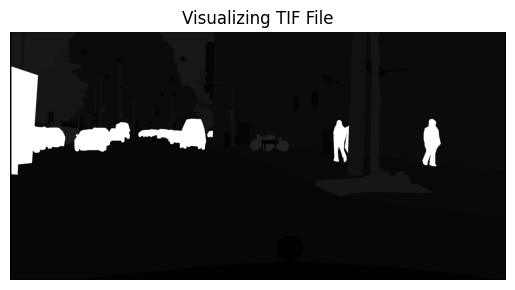

In [38]:
# # Create a list of all JSON files from gtFine
# json_files = []
# for root, dirs, files in os.walk(gtFine_CorePath):
#     # Exclude "test" folder
#     dirs[:] = [d for d in dirs if d != "test"]
#     for file in files:
#         if file.endswith('.json'):
#             json_files.append(os.path.join(root, file))

# Randomly select a JSON file from gtFine
if not gtFine_json_files:
    print("No JSON files found in gtFine dataset.")
else:
    sample_json = random.choice(gtFine_json_files)
    print(f"Randomly Selected JSON file: {sample_json}")
    sample_gtFine_data = parse_json_file(sample_json)

    # Derive the corresponding .tif file path in gtFinePanopticParts
    json_filename = os.path.basename(sample_json)
    tif_filename = json_filename.replace('_gtFine_polygons.json', '_gtFinePanopticParts.tif')
    gtBbox_json_filename = json_filename.replace('_gtFine_polygons.json', '_gtBboxCityPersons.json')

    gtBbox_jsonFilePath = None
    for root, _, files in os.walk(gtBbox_CorePath):
        for file in files:
            if file == gtBbox_json_filename:
                gtBbox_jsonFilePath = os.path.join(root, file)
                sample_gtBbox_data = parse_json_file(gtBbox_jsonFilePath)
                print(f"Corresponding .json from gtBbox_cityPersons file: {gtBbox_jsonFilePath}")
                break

    tif_file_path = None
    for root, _, files in os.walk(gtFinePano_CorePath):
        for file in files:
            if file == tif_filename:
                tif_file_path = os.path.join(root, file)
                break
        if tif_file_path:
            break

    # Visualize the .tif file if it exists
    if tif_file_path:
        print(f"Corresponding TIF file: {tif_file_path}")
        tif_image = Image.open(tif_file_path)
        plt.imshow(tif_image)
        plt.title("Visualizing TIF File")
        plt.axis('off')  # Turn off axis for better visualization
        plt.show()
    else:
        print(f"No corresponding TIF file found for {sample_json}")

In [39]:
sample_gtBbox_data

{'imgHeight': 1024,
 'imgWidth': 2048,
 'objects': [{'instanceId': 24000,
   'bbox': [1329, 367, 70, 171],
   'bboxVis': [1336, 367, 55, 171],
   'label': 'pedestrian'},
  {'instanceId': 24001,
   'bbox': [1384, 376, 66, 162],
   'bboxVis': [1384, 391, 20, 113],
   'label': 'pedestrian'},
  {'instanceId': 24002,
   'bbox': [1697, 364, 79, 193],
   'bboxVis': [1704, 364, 72, 193],
   'label': 'pedestrian'},
  {'instanceId': 0,
   'bbox': [1839, 390, 28, 24],
   'bboxVis': [1839, 390, 28, 24],
   'label': 'ignore'},
  {'instanceId': 0,
   'bbox': [357, 392, 15, 9],
   'bboxVis': [357, 392, 15, 9],
   'label': 'ignore'},
  {'instanceId': 0,
   'bbox': [524, 403, 18, 18],
   'bboxVis': [524, 403, 18, 18],
   'label': 'ignore'}]}

In [40]:
# Annotation Summary for gtFine .json files
def display_annotation_summary(data):
    print("Annotation Summary:")
    print(f"Image Dimensions: {data['imgWidth']}x{data['imgHeight']}")
    print("Objects:")
    for obj in data['objects'][:10]:  # Limit to the first 10 objects for brevity
        print(f"- Label: {obj['label']}, Number of Points in Polygon: {len(obj['polygon'])}")

# Display the summary of the parsed JSON data
if sample_json:
    display_annotation_summary(sample_gtFine_data)

Annotation Summary:
Image Dimensions: 2048x1024
Objects:
- Label: road, Number of Points in Polygon: 7
- Label: sky, Number of Points in Polygon: 5
- Label: sky, Number of Points in Polygon: 5
- Label: sidewalk, Number of Points in Polygon: 19
- Label: terrain, Number of Points in Polygon: 17
- Label: vegetation, Number of Points in Polygon: 9
- Label: static, Number of Points in Polygon: 16
- Label: building, Number of Points in Polygon: 61
- Label: static, Number of Points in Polygon: 12
- Label: dynamic, Number of Points in Polygon: 14


In [15]:
def count_labels_with_details(data):
    # Dictionary to store label details
    label_details = defaultdict(list)

    for obj in data["objects"]:
        label_details[obj["label"]].append(obj)

    # Generate results
    result = {}
    for label, objects in label_details.items():
        unique_instance_ids = set(obj["instanceId"] for obj in objects)
        result[label] = {
            "count": len(unique_instance_ids),
            "details": objects
        }

    return result

label_summary = count_labels_with_details(sample_gtBbox_data)

# Print or process the results
for label, details in label_summary.items():
    print(f"Label: {label}")
    print(f"Count: {details['count']}")
    print("Details:")
    for obj in details["details"]:
        print(obj)

Label: pedestrian
Count: 1
Details:
{'instanceId': 24000, 'bbox': [314, 436, 18, 42], 'bboxVis': [316, 437, 15, 23], 'label': 'pedestrian'}
Label: ignore
Count: 1
Details:
{'instanceId': 0, 'bbox': [1032, 387, 17, 18], 'bboxVis': [1032, 387, 17, 18], 'label': 'ignore'}


In [20]:
# Count images in each city folder
def count_images_in_cities(base_path):
    city_counts = {}
    if os.path.exists(base_path):
        for city in os.listdir(base_path):
            city_path = os.path.join(base_path, city)
            if os.path.isdir(city_path):
                image_count = len(os.listdir(city_path))
                city_counts[city] = (image_count, int(image_count / 4))
    return city_counts

# Count images in 'train' and 'val' splits for both datasets
gtFine_train_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "train"))
gtFine_val_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "val"))
gtFine_test_counts = count_images_in_cities(os.path.join(gtFine_CorePath, "test"))
gtFinePano_train_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "train"))
gtFinePano_val_counts = count_images_in_cities(os.path.join(gtFinePano_CorePath, "val"))
gtBbox_train_counts = count_images_in_cities(os.path.join(gtBbox_CorePath, "train"))
gtBbox_val_counts = count_images_in_cities(os.path.join(gtBbox_CorePath, "val"))

# Create PANDAS dataframe
print("Name of the cities and number of unique IDs per city in gtFine dataset:")
# Save city image counts for gtFine dataset in pandas DataFrame
gtFine_city_trainImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_train_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_valImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_val_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])
gtFine_city_testImg_pd = pd.DataFrame([(city, count[0], count[1]) for city, count in gtFine_test_counts.items()], columns=["City", "FileCounts", "ImgPerUniqueID"])

# Print the gtFine DataFrame
print(gtFine_city_trainImg_pd)
print(gtFine_city_valImg_pd)
print(gtFine_city_testImg_pd)

# Creat PANDAS dataframe for GtBbox_CityPersons dataset
print("\nName of the cities and number of unique IDs per city in gtBbox_CityPerson dataset:")
# # Save city image counts for gtFine dataset in pandas DataFrame
gtBbox_city_trainImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtBbox_train_counts.items()], columns=["City", "FileCounts"])
gtBbox_city_valImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtBbox_val_counts.items()], columns=["City", "FileCounts"])

# Print the gtBbox_CityPersons Dataframe
print(gtBbox_city_trainImg_pd)
print(gtBbox_city_valImg_pd)


print("\nName of the cities and number of unique IDs per city in gtFinePanopticParts dataset:")
# Save city image counts for gtFinePanopticParts dataset in pandas DataFrame
gtFinePano_city_trainImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_train_counts.items()], columns=["City", "ImageCounts"])
gtFinePano_city_valImg_pd = pd.DataFrame([(city, count[0]) for city, count in gtFinePano_val_counts.items()], columns=["City", "ImageCounts"])

# Print the gtFinePanopticParts DataFrame
print(gtFinePano_city_trainImg_pd)
print(gtFinePano_city_valImg_pd)

Name of the cities and number of unique IDs per city in gtFine dataset:
               City  FileCounts  ImgPerUniqueID
0           hanover         784             196
1        dusseldorf         884             221
2            aachen         696             174
3           cologne         616             154
4         stuttgart         784             196
5              jena         476             119
6           krefeld         396              99
7            zurich         488             122
8            bochum         384              96
9           hamburg         992             248
10           bremen        1264             316
11       strasbourg        1460             365
12        darmstadt         340              85
13              ulm         380              95
14  monchengladbach         376              94
15           weimar         568             142
16           erfurt         436             109
17         tubingen         576             144
        City  Fi

In [22]:
# Verify that all files (images and annotations) can be opened without errors.
def check_corrupted_images(base_path):
    corrupted_files = []
    for root, _, files in os.walk(base_path):
        for file in files:
            try:
                file_path = os.path.join(root, file)
                if file.lower().endswith(('.png', '.tif')):
                    with Image.open(file_path) as img:
                        img.verify()  # Check for corrupted images
            except Exception as e:
                corrupted_files.append(file_path)
    return corrupted_files

# Check for corrupted files in gtFine and gtFinePanopticParts
corrupted_gtFine = check_corrupted_images(gtFine_CorePath)
corrupted_gtFinePanopticParts = check_corrupted_images(gtFinePano_CorePath)
corrupted_gtBbox = check_corrupted_images(gtBbox_CorePath)

print("Corrupted files in gtFine dataset:", corrupted_gtFine)
print("Corrupted files in gtFinePanopticParts dataset:", corrupted_gtFinePanopticParts)
print("Corrupted files in gtBbox_CityPersons dataset:", corrupted_gtBbox)

Corrupted files in gtFine dataset: []
Corrupted files in gtFinePanopticParts dataset: []
Corrupted files in gtBbox_CityPersons dataset: []


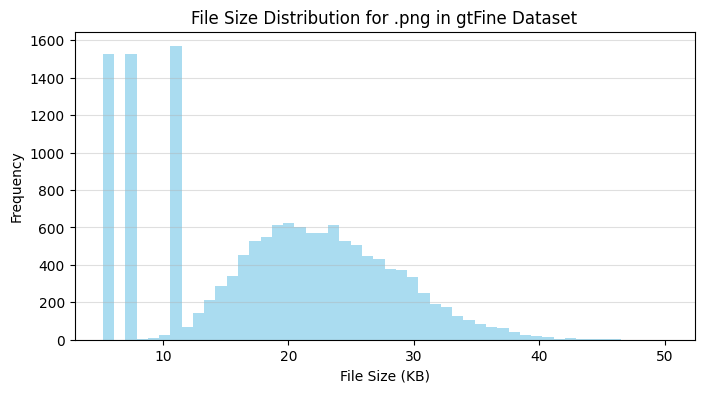

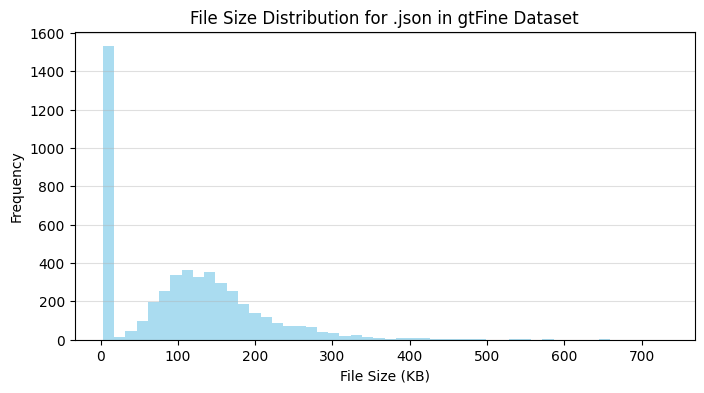

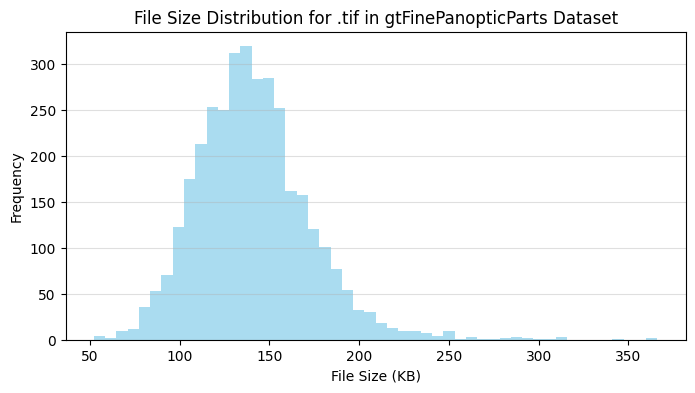

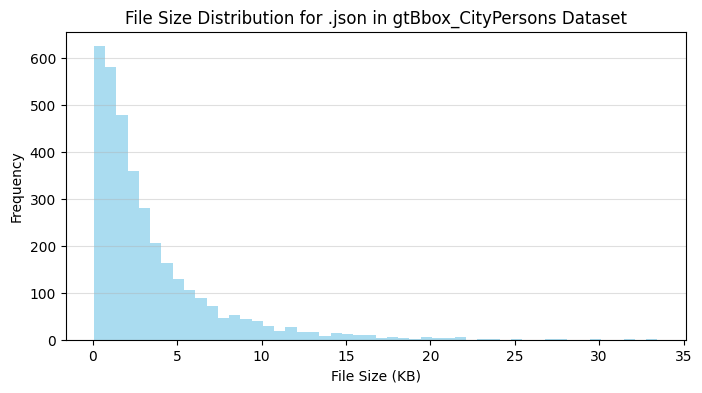

In [23]:
# Function to calculate file sizes for specific file types
def get_file_sizes_for_types(directory, file_types):
    file_sizes_by_type = {file_type: [] for file_type in file_types}
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            file_type = os.path.splitext(file)[-1].lower()
            if file_type in file_sizes_by_type:
                size = os.path.getsize(file_path) / 1e3  # Convert bytes to KB
                file_sizes_by_type[file_type].append(size)
    return file_sizes_by_type

# Define the file types to analyze
gtFine_file_types = [".png", ".json"]
gtFinePano_file_type = [".tif"]
gtBbox_file_types = [".json"]

# Analyze file sizes for specific file types in both datasets
gtFine_file_sizes_selected = get_file_sizes_for_types(gtFine_CorePath, gtFine_file_types)
gtFinePanoptic_file_sizes_selected = get_file_sizes_for_types(gtFinePano_CorePath, gtFinePano_file_type)
gtBbox_file_sizes_selected = get_file_sizes_for_types(gtBbox_CorePath, gtBbox_file_types)

# Function to plot file size distribution for specific file types
def plot_file_sizes_for_types(file_sizes_by_type, dataset_name):
    for file_type, sizes in file_sizes_by_type.items():
        plt.figure(figsize=(8, 4))
        plt.hist(sizes, bins=50, alpha=0.7, color="skyblue")
        plt.xlabel("File Size (KB)")
        plt.ylabel("Frequency")
        plt.title(f"File Size Distribution for {file_type} in {dataset_name}")
        plt.grid(axis="y", alpha=0.40)
        plt.show()

# Plot file size distribution for gtFine dataset
plot_file_sizes_for_types(gtFine_file_sizes_selected, "gtFine Dataset")
print("\n")
# Plot file size distribution for gtFinePanopticParts dataset
plot_file_sizes_for_types(gtFinePanoptic_file_sizes_selected, "gtFinePanopticParts Dataset")
print("\n")
# Plot file size distribution for gtBbox_CityPersons dataset
plot_file_sizes_for_types(gtBbox_file_sizes_selected, "gtBbox_CityPersons Dataset")


### Image Resolution Consistency

In [26]:
# Image Resolution Consistency
def check_image_resolutions(base_path):
    resolutions = Counter()
    for root, _, files in os.walk(base_path):
        for file in files:
            if file.lower().endswith(('.png', '.tif')):
                with Image.open(os.path.join(root, file)) as img:
                    resolutions[img.size] += 1
    return resolutions

# Check resolutions for both datasets
gtFine_resolutions = check_image_resolutions(gtFine_CorePath)
gtFinePanoptic_resolutions = check_image_resolutions(gtFinePano_CorePath)

print("Image resolutions in gtFine dataset:", gtFine_resolutions)
print("Image resolutions in gtFinePanopticParts dataset:", gtFinePanoptic_resolutions)

Image resolutions in gtFine dataset: Counter({(2048, 1024): 15000})
Image resolutions in gtFinePanopticParts dataset: Counter({(2048, 1024): 3475})


In [30]:
def validate_metadata(json_path, image_path):
    with open(json_path, 'r') as f:
        metadata = json.load(f)
    img_width, img_height = metadata['imgWidth'], metadata['imgHeight']
    with Image.open(image_path) as img:
        if img.size != (img_width, img_height):
            print(f"Mismatch in dimensions: JSON({img_width}x{img_height}) vs Image({img.size})")
        else: print(f"Dimensions match: JSON({img_width}x{img_height}) vs Image({img.size})")

# Example validation for a sample JSON and image file
validate_metadata(sample_json, color_image_path)
validate_metadata(gtBbox_jsonFilePath, color_image_path)

Dimensions match: JSON(2048x1024) vs Image((2048, 1024))
Dimensions match: JSON(2048x1024) vs Image((2048, 1024))


In [43]:
def analyze_class_distribution(json_files):
    class_counts = Counter()
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
        for obj in data['objects']:
            class_counts[obj['label']] += 1
    return class_counts

gtFine_class_distribution = analyze_class_distribution(gtFine_json_files)
print(pd.DataFrame(gtFine_class_distribution.items(), columns=["Class", "Count"]))
print("\n")
gtBbox_class_distribution = analyze_class_distribution(gtBbox_json_files)
print(pd.DataFrame(gtBbox_class_distribution.items(), columns=["Class", "Count"]))

                   Class  Count
0            ego vehicle   5000
1             out of roi   5000
2   rectification border   7376
3                    sky   3421
4                   road   3616
5             vegetation  17745
6                terrain   5070
7                 static  47217
8               sidewalk   8349
9                 person  21413
10                  pole  52748
11         traffic light  11898
12                   car  31822
13          traffic sign  24976
14                ground   2151
15         license plate   6289
16                 rider   2363
17               bicycle   4904
18              building   8301
19               dynamic   4253
20                 fence   2839
21               parking   1216
22                  wall   1979
23          bicyclegroup   1049
24              cargroup   2055
25                   bus    483
26               trailer     89
27           persongroup   1069
28            motorcycle    888
29             polegroup    364
30      

Average Object Density: 57.49


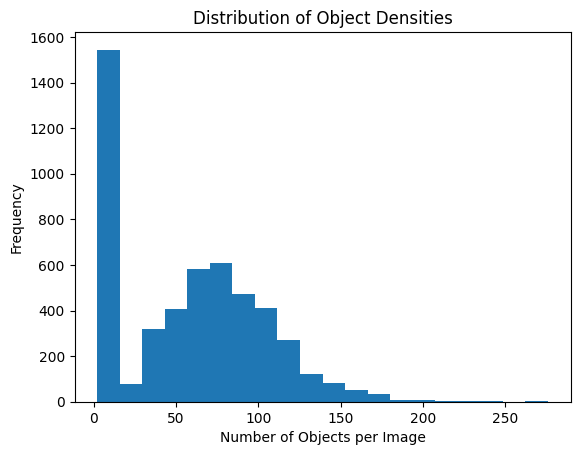

Average Object Density: 9.66


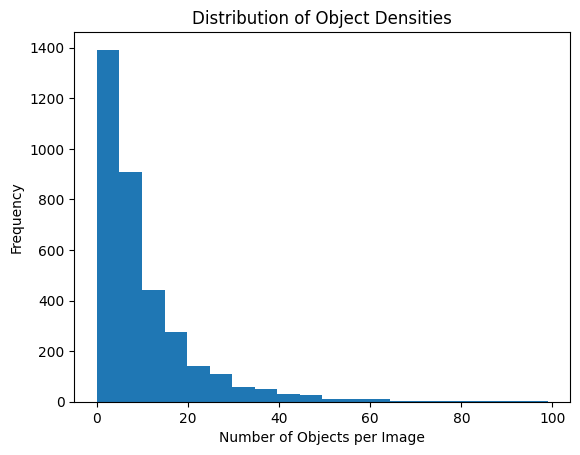

In [47]:
def calculate_object_density(json_files):
    densities = []
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
        densities.append(len(data['objects']))
    return densities

gtFine_object_densities = calculate_object_density(gtFine_json_files)
print(f"Average Object Density: {np.mean(gtFine_object_densities):.2f}")
plt.hist(gtFine_object_densities, bins=20)
plt.title("Distribution of Object Densities")
plt.xlabel("Number of Objects per Image")
plt.ylabel("Frequency")
plt.show()

gtBbox_object_densities = calculate_object_density(gtBbox_json_files)
print(f"Average Object Density: {np.mean(gtBbox_object_densities):.2f}")
plt.hist(gtBbox_object_densities, bins=20)
plt.title("Distribution of Object Densities")
plt.xlabel("Number of Objects per Image")
plt.ylabel("Frequency")
plt.show()

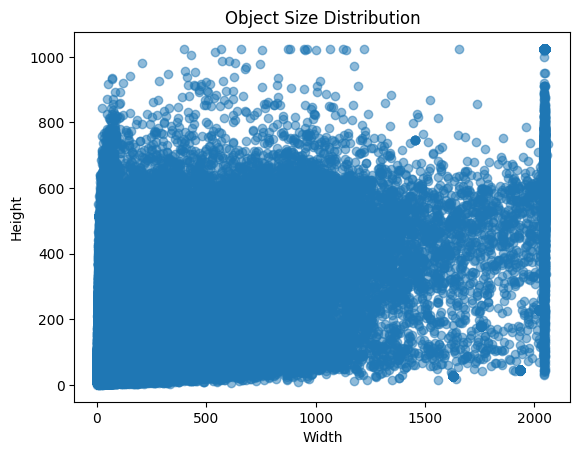

In [55]:
def calculate_object_sizes(json_files):
    sizes = []
    for file in json_files:
        with open(file, 'r') as f:
            data = json.load(f)
        for obj in data['objects']:
            polygon = np.array(obj['polygon'])
            bbox_width = polygon[:, 0].max() - polygon[:, 0].min()
            bbox_height = polygon[:, 1].max() - polygon[:, 1].min()
            sizes.append((bbox_width, bbox_height))
    return sizes

object_sizes = calculate_object_sizes(gtFine_json_files)
widths, heights = zip(*object_sizes)
plt.scatter(widths, heights, alpha=0.5)
plt.title("Object Size Distribution")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()

Visualizing gtFine dataset file counts...


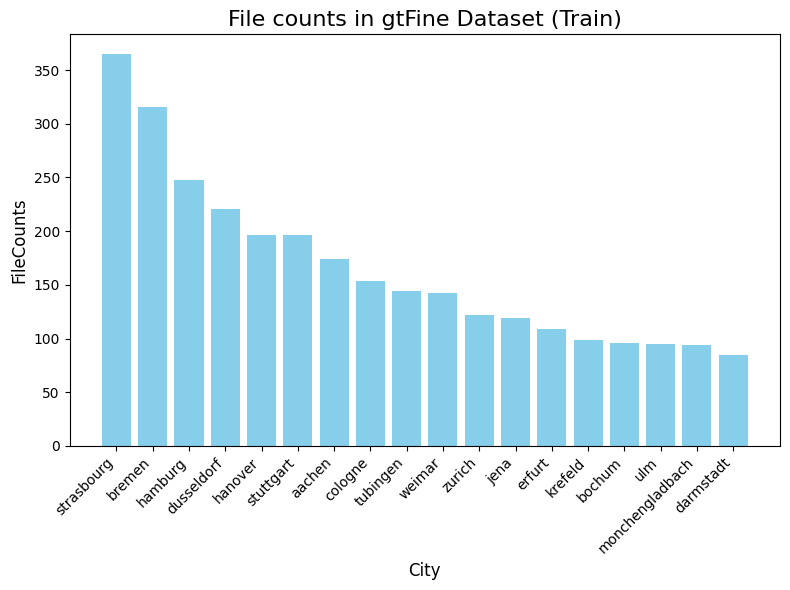

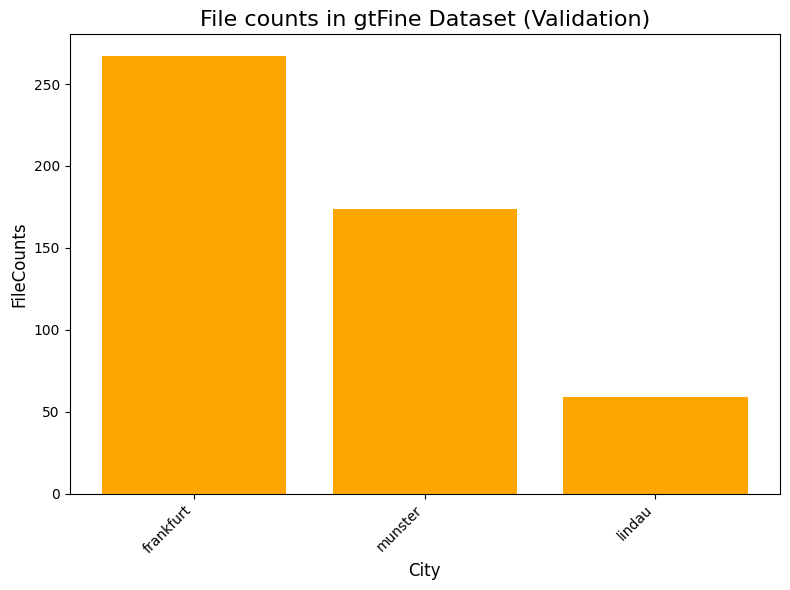

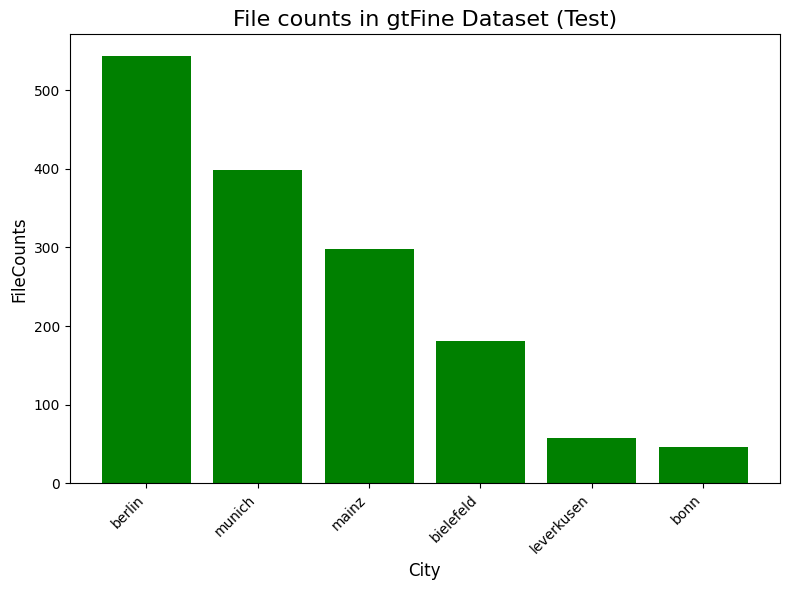

In [56]:
# Visualize cities name and the number of images per each unique ID
def gtFine_plot_city_counts(data, title, color):
    data.sort_values(by="FileCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImgPerUniqueID"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("FileCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFine dataset
print("Visualizing gtFine dataset file counts...")
gtFine_plot_city_counts(gtFine_city_trainImg_pd, "File counts in gtFine Dataset (Train)", "skyblue")
gtFine_plot_city_counts(gtFine_city_valImg_pd, "File counts in gtFine Dataset (Validation)", "orange")
gtFine_plot_city_counts(gtFine_city_testImg_pd, "File counts in gtFine Dataset (Test)", "green")

In [ ]:
# Visualize cities name and the number of images per each unique ID
def gtFinePano_plot_city_counts(data, title, color):
    data.sort_values(by="ImageCounts", ascending=False, inplace=True)
    plt.figure(figsize=(8, 6))
    plt.bar(data["City"], data["ImageCounts"], color=color)
    plt.xlabel("City", fontsize=12)
    plt.ylabel("ImageCounts", fontsize=12)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=45, ha="right", fontsize=10)
    plt.tight_layout()
    plt.show()

# Plotting for gtFinePanopticParts dataset
print("Visualizing gtFinePanopticParts dataset image counts...")
gtFinePano_plot_city_counts(gtFinePano_city_trainImg_pd, "Image Counts in gtFinePanopticParts Dataset (Train)", "purple")
gtFinePano_plot_city_counts(gtFinePano_city_valImg_pd, "Image Counts in gtFinePanopticParts Dataset (Validation)", "red")

Analyze the instance statistics for all cities in the train folder.


In [57]:
def analyze_instance_stats_in_train(gtFine_CorePath):
    instance_counts = {}
    train_path = os.path.join(gtFine_CorePath, "train")

    # Loop through all cities in the train folder
    for city in os.listdir(train_path):
        city_path = os.path.join(train_path, city)
        if not os.path.isdir(city_path):
            continue

        # Get instance image paths for the city
        instance_image_paths = [
            os.path.join(city_path, file)
            for file in os.listdir(city_path)
            if "_gtFine_instanceIds.png" in file
        ]

        # Count instances for each image
        city_instance_counts = []
        for img_path in instance_image_paths:
            instance_mask = np.array(Image.open(img_path))
            unique_ids = np.unique(instance_mask)
            city_instance_counts.append(len(unique_ids) - 1)  # Exclude background (id=0)

        # Store results
        instance_counts[city] = city_instance_counts

    return instance_counts

# Analyze instance statistics for all cities in the train folder
train_instance_counts = analyze_instance_stats_in_train(gtFine_CorePath)

# Flatten instance counts across all cities
all_instance_counts = [count for city_counts in train_instance_counts.values() for count in city_counts]

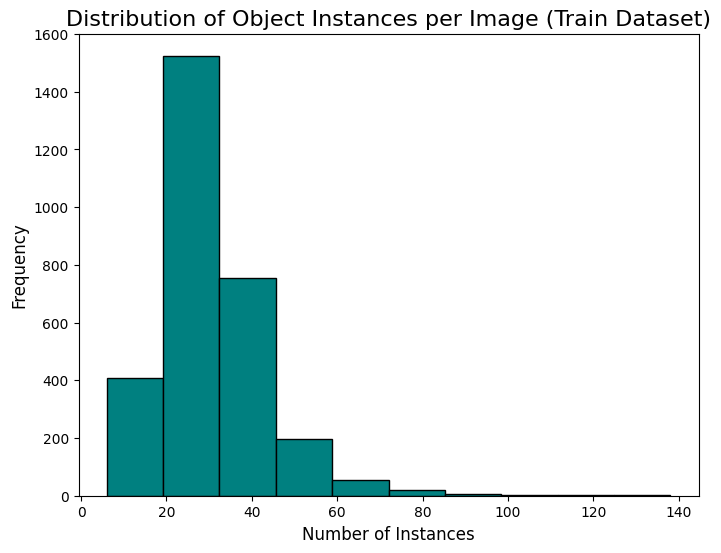

,Statistic,Value
0,Total Images,2975.000000
1,Mean Instances per Image,30.721681
2,Median Instances per Image,29.000000
3,Max Instances in an Image,138.000000
4,Min Instances in an Image,6.000000


In [58]:
# Plot the distribution of instances
plt.figure(figsize=(8, 6))
plt.hist(all_instance_counts, bins=10, color='teal', edgecolor='black')
plt.title("Distribution of Object Instances per Image (Train Dataset)", fontsize=16)
plt.xlabel("Number of Instances", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

# Display summary statistics
instance_summary = {
    "Total Images": len(all_instance_counts),
    "Mean Instances per Image": np.mean(all_instance_counts),
    "Median Instances per Image": np.median(all_instance_counts),
    "Max Instances in an Image": np.max(all_instance_counts),
    "Min Instances in an Image": np.min(all_instance_counts),
}
# print("Instance Statistics Summary:", instance_summary)
instance_summary_pd = pd.DataFrame(list(instance_summary.items()), columns=["Statistic", "Value"])
instance_summary_pd